In [1]:
# Install packages
# %pip install networkx
# %pip install numpy
# %pip install tqdm
# %pip install matplotlib

In [1]:
# The starter code is short and simple, take a look!
from starter import *
from solve_ import *
from solve_1 import *
from solve_2 import *
from solve_2hard import *
from solve_clean import *
# from greedy import *
# from solve_sa import *
# from simulated_annealing import *
import random

# Phase 1 - Create Inputs

In [2]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input
    sum_weights = 0
    start, end = 0, 1
    while sum_weights < 500000:
        add = 1000
        G.add_edge(start, end, weight=add)
        sum_weights += add
        start += 1
        end += 1
    
def medium(G: nx.Graph):
    # TODO add edges to complete the medium input
    sum_weights = 0
    start, end = 0, 1
    while sum_weights < 500000:
        add = 500
        G.add_edge(start, end, weight=add)
        sum_weights += add
        start += 1
        end += 1

    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    sum_weights = 0
    start, end = 0, 1
    while sum_weights < 500000:
        add = 250
        G.add_edge(start, end, weight=add)
        sum_weights += add
        start += 1
        end += 1

def test(G: nx.Graph):
    G.add_edge(0, 1, weight=random.randint(1, 1000))
    G.add_edge(0, 3, weight=random.randint(1, 1000))
    G.add_edge(1, 2, weight=random.randint(1, 1000))
    G.add_edge(1, 3, weight=random.randint(1, 1000))
    G.add_edge(2, 3, weight=random.randint(1, 1000))
    G.add_edge(2, 4, weight=random.randint(1, 1000))
    G.add_edge(2, 5, weight=random.randint(1, 1000))
    G.add_edge(3, 4, weight=random.randint(1, 1000))
    G.add_edge(4, 8, weight=random.randint(1, 1000))
    G.add_edge(4, 0, weight=random.randint(1, 1000))
    G.add_edge(5, 6, weight=random.randint(1, 1000))
    G.add_edge(5, 8, weight=random.randint(1, 1000))
    G.add_edge(5, 7, weight=random.randint(1, 1000))
    G.add_edge(6, 7, weight=random.randint(1, 1000))
    G.add_edge(7, 9, weight=random.randint(1, 1000))
    G.add_edge(8, 10, weight=random.randint(1, 1000))
    G.add_edge(8, 11, weight=random.randint(1, 1000))
    G.add_edge(8, 9, weight=random.randint(1, 1000))
    G.add_edge(9, 11, weight=random.randint(1, 1000))
    G.add_edge(10, 11, weight=random.randint(1, 1000))
    G.add_edge(10, 9, weight=random.randint(1, 1000))

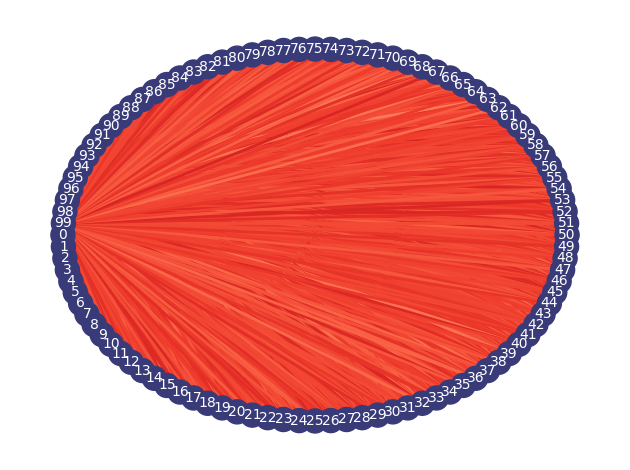

In [3]:
G = read_input('./inputs/small1.in')
visualize(G)

In [4]:
# test delete later
def write_input_test(G: nx.Graph, path: str, overwrite: bool=False):
    assert overwrite or not os.path.exists(path), \
        'File already exists and overwrite set to False. Move file or set overwrite to True to proceed.'
    with open(path, 'w') as fp:
        json.dump(nx.node_link_data(G), fp)

def read_input_test(path: str):
    def validate_graph(G: nx.Graph):
        assert not G.is_directed(), 'G should not be directed'
        assert set(G) == set(range(G.number_of_nodes())), 'Nodes must be numbered from 0 to n-1'
        return True
    
    def validate_input(G: nx.Graph):
        for n, d in G.nodes(data=True):
            assert not d, 'Nodes cannot have data'
        for u, v, d in G.edges(data=True):
            assert u != v, 'Edges should be between distinct vertices (a penguin is experiencing inner-conflict)'
            assert set(d) == {'weight'}, 'Edge must only have weight data'
            assert isinstance(d['weight'], int), 'Edge weights must be integers'
            assert d['weight'] > 0, 'Edge weights must be positive'
            # assert d['weight'] <= MAX_WEIGHT, f'Edge weights cannot be greater than {MAX_WEIGHT}'
        # assert G.number_of_edges() <= MAX_EDGES, 'Graph has too many edges'
        # assert sum(d for u, w, d in G.edges(data='weight')) >= MAX_WEIGHT*MAX_EDGES*0.05, \
            # f'There must be at least {MAX_WEIGHT*MAX_EDGES*0.05} edge weight in the input.'
        assert not G.is_multigraph()
        return validate_graph(G)
    
    # assert os.path.getsize(path) < INPUT_SIZE_LIMIT, 'This input file is too large'
    with open(path) as fp:
        G = nx.node_link_graph(json.load(fp), multigraph=False)
        if validate_input(G):
            return G

G = nx.empty_graph(12)
test(G)
write_input_test(G, 'test.in')

G = read_input_test('test.in')
print(f'read and visualize input {visualize(G)}')

def get_cluster(G: nx.Graph) -> nx.Graph:
   """
   Input G should be a copy, we should not modify the original graph
   if check, return G; else, separate into clusters and return those
   """
   def check(G: nx.Graph, E: set):
      """Needs more than 1/2 of nodes to cluster"""
      print(len(E), G.number_of_nodes() // 2)
      return len(E) > G.number_of_nodes() // 2
      
   
   E = nx.algorithms.connectivity.cuts.minimum_edge_cut(G)
   if not check(G, E):
      # remove edges in E
      for e in E:
         G.remove_edge(*e)
      clusters = [G.subgraph(c).copy() for c in nx.connected_components(G)]
      if len(clusters) == 2:
         res = get_cluster(clusters[0])
         res1 = get_cluster(clusters[1])

         G = nx.compose(res, res1)
   
   return G

subgraphs = get_cluster(G)
visualize(subgraphs)




AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

In [5]:
# 4 by 4 case from homework
def four_by_four():
    test = nx.empty_graph(16)
    for i in range(0, 3):
        test.add_edge(i, i+1, weight=100)
        test.add_edge(i+4, i+4+1, weight=100)
        test.add_edge(i+8, i+8+1, weight=100)
        test.add_edge(i+12, i+12+1, weight=100)
        test.add_edge(i*4, (i+1)*4, weight = 100)
        test.add_edge((i*4)+1, ((i+1)*4) + 1, weight = 100)
        test.add_edge((i*4)+2, ((i+1)*4) + 2, weight = 100)
        test.add_edge((i*4)+3, ((i+1)*4) + 3, weight = 100)
    return test


In [6]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

# Phase 2 - Implement your Solver

In [7]:
import networkx as nx
import numpy as np
import os
import json
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from pathlib import Path
from tqdm.auto import tqdm
import tarfile
from starter import *
import random

# fill random teamless nodes with min total team + yes team_sizes[old_team] -= 1
# def solve(G: nx.Graph):
#     min_score = float("inf")
#     for _ in range(3):
#         G_copy = G.copy()
#         solve(G_copy)
#         temp_score = score(G_copy)
#         if temp_score < min_score:
#             min_score = temp_score
#             min_G = G_copy.copy()
#     for i in G.nodes:
#         G.nodes[i]["team"] = min_G.nodes[i]["team"]

def solve_greedy(G: nx.Graph):
    def new_first(G, curr, old_team, new_team, old_first):
        for z in G.neighbors(curr):
            if G.nodes[z]["team"] == old_team:
                old_first -= G[curr][z]["weight"]
            if G.nodes[z]["team"] == new_team:
                old_first += G[curr][z]["weight"]
        return old_first

    def new_third(team_sizes, old_team, new_team, old_third, V, k):
        old_b = (math.log(old_third))/B_EXP
        b_i = (team_sizes[old_team]/V) - (1/k)
        b_j = (team_sizes[new_team]/V) - (1/k)
        rad = ((old_b**2) - (b_i**2) - (b_j**2) + (b_i - (1/V))**2 + (b_j + (1/V))**2)
        if rad < 0:
            rad = 0
        return math.exp(B_EXP*math.sqrt(rad))

    V = G.number_of_nodes()
    upper_k = 2*int(((V+1)**(1/2)))
    min_cost = float("inf")
    min_G = G.copy()
    possible_k = range(1, upper_k)
    nodes = sorted(G.degree(weight="weight"), key=lambda x: x[1])
    biggest_node = sorted(G.degree(weight="weight"), key=lambda x: x[1])[-1][0]

    for k in possible_k:
        G_copy = G.copy()
        team_sizes = {i:0 for i in range(1, k+1)}
        '''
        RANDOMLY ASSIGN TEAMS TO NODES
        '''
        for i in range(V):
            team = random.choice(range(1, k+1))
            G_copy.nodes[i]["team"] = team
            team_sizes[team] += 1
        # '''
        # ITERATE THROUGH SORTED NODES AND ASSIGN TEAMS TO MIN_TOT_TEAM
        # '''
        # queue = [i[0] for i in nodes]
        # for curr in queue:
        #     old_team = G_copy.nodes[curr]["team"]
        #     edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1))
        #     adj_team_counter = {i:0 for i in range(1, k+1)}
        #     for i in edges:
        #         neighbor = i[1]
        #         if "team" in G_copy.nodes[neighbor]:
        #             adj_team = G_copy.nodes[neighbor]["team"]
        #             adj_team_counter[adj_team] += i[2]["weight"]
        #     smallest_team = min(adj_team_counter, key=adj_team_counter.get)
        #     G_copy.nodes[curr]["team"] = smallest_team
        #     team_sizes[smallest_team] += 1
        # '''
        # DFS TO INITIALIZE ALL G_COPY NODES TO MIN_ADJ_TEAM 
        # '''
        # queue = [biggest_node]
        # visited = [False for _ in range(V)]
        # while queue:
        #     curr = queue.pop()
        #     old_team = G_copy.nodes[curr]["team"]
        #     if not visited[curr]:
        #         edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1))
        #         adj_team_counter = {i:0 for i in range(1, k+1)}
        #         for i in edges:
        #             neighbor = i[1]
        #             if "team" in G_copy.nodes[neighbor]:
        #                 adj_team = G_copy.nodes[neighbor]["team"]
        #                 adj_team_counter[adj_team] += i[2]["weight"]
        #             if not visited[neighbor]:
        #                 queue.append(neighbor)
        #         smallest_team = min(adj_team_counter, key=adj_team_counter.get)
        #         G_copy.nodes[curr]["team"] = smallest_team
        #         team_sizes[smallest_team] += 1
        #         team_sizes[old_team] -= 1
        #         visited[curr] = True
        '''
        DFS AND ASSIGN NODES BY CHOOSING BETWEEN MIN_ADJ_TEAM AND MIN_TOT_TEAM
        '''
        for _ in range(k):
            curr_first, curr_second, curr_third = score(G_copy, separated=True)
            curr_score = curr_first + curr_second + curr_third
            visited = [False for _ in range(V)]
            queue = [biggest_node]
            while queue:
                curr = queue.pop()
                if not visited[curr]:
                    edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1))
                    adj_team_counter = {i:0 for i in range(1, k+1)}
                    for i in edges:
                        neighbor = i[1]
                        if "team" in G_copy.nodes[neighbor]:
                            adj_team = G_copy.nodes[neighbor]["team"]
                            adj_team_counter[adj_team] += i[2]["weight"]
                        if not visited[neighbor]:
                            queue.append(neighbor)
                    
                    # HOW DO WE CHOOSE BETWEEN MIN_ADJ_TEAM AND MIN_TOT_TEAM ?
                    old_team = G_copy.nodes[curr]["team"]
                    min_adj_team = min(adj_team_counter, key=adj_team_counter.get)
                    min_tot_team = min(team_sizes, key=team_sizes.get)
                    
                    adj_first = new_first(G_copy, curr, old_team, min_adj_team, curr_first)
                    adj_third = new_third(team_sizes, old_team, min_adj_team, curr_third, V, k)
                    adj_score = adj_first + curr_second + adj_third

                    tot_first = new_first(G_copy, curr, old_team, min_tot_team, curr_first)
                    tot_third = new_third(team_sizes, old_team, min_tot_team, curr_third, V, k)
                    tot_score = tot_first + curr_second + tot_third

                    if adj_score < curr_score:
                        G_copy.nodes[curr]["team"] = min_adj_team
                        team_sizes[min_adj_team] += 1
                        team_sizes[old_team] -= 1
                        curr_first = adj_first
                        curr_third = adj_third
                        curr_score = adj_score
                    old_team = G_copy.nodes[curr]["team"]
                    if tot_score < curr_score:
                        G_copy.nodes[curr]["team"] = min_tot_team
                        team_sizes[min_tot_team] += 1
                        team_sizes[old_team] -= 1
                        curr_first = tot_first
                        curr_third = tot_third
                        curr_score = tot_score
                    visited[curr] = True
        # '''
        # ITERATE THROUGH SORTED NODES AND ASSIGN TEAMS TO MIN_TOT_TEAM
        # '''
        for _ in range(k):
            queue = [i[0] for i in nodes]
            for curr in queue:
                curr_first, curr_second, curr_third = score(G_copy, separated=True)
                curr_score = curr_first + curr_second + curr_third
                edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1))
                adj_team_counter = {i:0 for i in range(1, k+1)}
                for i in edges:
                    neighbor = i[1]
                    adj_team = G_copy.nodes[neighbor]["team"]
                    adj_team_counter[adj_team] += i[2]["weight"]
                old_team = G_copy.nodes[curr]["team"]
                min_adj_team = min(adj_team_counter, key=adj_team_counter.get)
                min_tot_team = min(team_sizes, key=team_sizes.get)
                
                adj_first = new_first(G_copy, curr, old_team, min_adj_team, curr_first)
                adj_third = new_third(team_sizes, old_team, min_adj_team, curr_third, V, k)
                adj_score = adj_first + curr_second + adj_third


                tot_first = new_first(G_copy, curr, old_team, min_tot_team, curr_first)
                tot_third = new_third(team_sizes, old_team, min_tot_team, curr_third, V, k)
                tot_score = tot_first + curr_second + tot_third

                if adj_score < curr_score:
                    G_copy.nodes[curr]["team"] = min_adj_team
                    team_sizes[min_adj_team] += 1
                    team_sizes[old_team] -= 1
                    curr_first = adj_first
                    curr_third = adj_third
                    curr_score = adj_score
                old_team = G_copy.nodes[curr]["team"]
                if tot_score < curr_score:
                    G_copy.nodes[curr]["team"] = min_tot_team
                    team_sizes[min_tot_team] += 1
                    team_sizes[old_team] -= 1
                    curr_first = tot_first
                    curr_third = tot_third
                    curr_score = tot_score
                    
        curr_cost = score(G_copy)
        if curr_cost <= min_cost:
            min_cost = curr_cost
            min_G = G_copy.copy()
        else:break
    for i in min_G.nodes:
        G.nodes[i]['team'] = min_G.nodes[i]['team']
    return G

In [8]:
# ignore OLD, OBSOLETE DO NO RUN
import networkx as nx
import random
from starter import *
import math

def solver(G: nx.Graph):
    def get_teams(G: nx.Graph):
        teams = {}
        for node in G.nodes:
            # print(f"G.nodes[node]['team']:   {G.nodes[node]}")
            if not G.nodes[node]: # no team is originally assigned, there should be no team 0's though..
                teams[0] = [node]
            else:
                id = G.nodes[node]['team']
                if id not in teams:
                    teams[id] = [node]
                else:
                    teams[id].append(node)
        return teams
    # input can be 3 cases:
    #   1) unchanged input            (old_graph)
    #   2) input but with 1 more team (new_graph_with1)
    #   3) input but with 1 less team (new_graph_with-1)
    # first, fix any disputes within same team if any and if possible
    #   find pairs of nodes with internal disputes
    #   then, randomly put these into teams where there won't be disputes
    # this will be our starting state
    # We will run an arbritary amount of iterations to even out the number of nodes in each team
    #   so we can have different permutations of teams
    #   we record the scores for each and take the best

    # reassign teams such that each team is roughly the same size
    # teamid_size = {}
    # teams = get_teams(G)
    # for id in teams:
    #     teamid_size[id] = len(teams[id])
    # print(f'teamid_size: {teamid_size}')

    # # find and reassign disputes
    # G_copy = G.copy()
    # teams = get_teams(G)
    # seen_pairs = set()
    # for id in teams:
    #     nodes = teams[id]
    #     available_teams = list(teams.keys())
    #     available_teams.remove(id)
    #     for compare_node in teams[id]:
    #         for node in teams[id]:
    #             if G.has_edge(compare_node, node) and node != compare_node and (compare_node, node) not in seen_pairs and (node, compare_node) not in seen_pairs:
    #                 reassign = random.choice([compare_node, node])
    #                 team_id = random.choice(available_teams)
    #                 G_copy.nodes[node]['team'] = team_id
    #                 seen_pairs.add((compare_node, node))
    #                 seen_pairs.add((node, compare_node))
    
    # print("solved disputes:")
    # visualize(G_copy)
    # print(f"teams: {get_teams(G_copy)}")


    # randomly choose a team
    teams = get_teams(G)
    team_id = random.choice(list(teams.keys()))
    


class SimulatedAnnealing:
    def __init__(self, initialSolution, solutionEvaluator, initialTemp, finalTemp, tempReduction, neighborOperator, iterationPerTemp=100, alpha=10, beta=5):
        self.solution = initialSolution
        self.evaluate = solutionEvaluator
        self.currTemp = initialTemp
        self.finalTemp = finalTemp
        self.iterationPerTemp = iterationPerTemp
        self.alpha = alpha
        self.beta = beta
        self.neighborOperator = neighborOperator

        if tempReduction == "linear":
            self.decrementRule = self.linearTempReduction
        elif tempReduction == "geometric":
            self.decrementRule = self.geometricTempReduction
        elif tempReduction == "slowDecrease":
            self.decrementRule = self.slowDecreaseTempReduction
        else:
            self.decrementRule = tempReduction

    def linearTempReduction(self):
        self.currTemp -= self.alpha

    def geometricTempReduction(self):
        self.currTemp *= self.alpha

    def slowDecreaseTempReduction(self):
        self.currTemp = self.currTemp / (1 + self.beta * self.currTemp)

    def isTerminationCriteriaMet(self, count):
        # can add more termination criteria
        # return self.currTemp <= self.finalTemp or self.neighborOperator(self.solution) == 0
        # return self.currTemp < self.finalTemp
        return count > 10

    def select_random_team(self, G: nx.Graph):
        teams = self.get_teams(G)
        team_id = random.choice(list(teams.keys()))
        return teams, team_id

    def get_teams(self, G: nx.Graph):
        teams = {}
        for node in G.nodes:
            if not G.nodes[node]: # no team is originally assigned, there should be no team 0's though..
                teams[0] = [node]
            else:
                id = G.nodes[node]['team']
                if id not in teams:
                    teams[id] = [node]
                else:
                    teams[id].append(node)
        return teams

    def run(self):
        # G_copy = None
        # while not self.isTerminationCriteriaMet():
        #     # iterate that number of times
        #     for i in range(self.iterationPerTemp):
        #         # get all of the neighbors (return a list)
        #         neighbors = self.neighborOperator(self.solution)
        #         # pick a random neighbor (pick randomly whether to increase/decrease partition)
        #         newSolution = random.choice(neighbors)
        #         # get the cost between the two solutions
        #         old_graph, new_graph = self.evaluate(self.solution), self.evaluate(newSolution)
        #         cost = score(old_graph) - score(new_graph)
        #         # if the new solution is better, accept it
        #         if cost >= 0:
        #             self.solution = newSolution
        #             G_copy = new_graph
        #             print(f"Current graph replaced with better one: {G_copy}")
        #             # print("visualize")
        #             # visualize(G_copy)
        #         # if the new solution is not better, accept it with a probability of e^(-cost/temp)
        #         else:
        #             print(f"new graph is worse, printing new k")
        #             print(self.currTemp)
        #             if random.uniform(0, 1) < math.exp(-cost / self.currTemp):
        #                 self.solution = newSolution
        #                 G_copy = new_graph
        #     # decrement the temperature
        #     self.decrementRule()

        # # return self.solution
        # return G_copy

        # G_copy = None
        count = 0
        while not self.isTerminationCriteriaMet(count):
            # iterate that number of times
            for i in range(self.iterationPerTemp):
                # randomly select a random team
                teams, team_id = self.select_random_team(self.solution)
                # randomly decide whether to increase/decrease partition
                newSolution = self.neighborOperator(self.solution, teams, team_id)
                # get the cost between the two solutions
                old_graph, new_graph = self.solution, newSolution
                cost = score(old_graph) - score(new_graph)
                # if the new solution is better, accept it
                if cost >= 0:
                    self.solution = newSolution
                    # G_copy = new_graph
                    # print(f"Current graph replaced with better one: {G_copy}")
                    # print("visualize")
                    # visualize(G_copy)
                    count += 1
                # if the new solution is not better, accept it with a probability of e^(-cost/temp)
                else:
                    # print(f"new graph is worse, printing new k")
                    # print(self.currTemp)
                    try:
                        if random.uniform(0, 1) < math.exp(-cost / self.currTemp):
                            self.solution = newSolution
                            count += 1
                    except:
                        pass
            # decrement the temperature
            self.decrementRule()

        return self.solution
        # return G_copy


def solve_sa_main1(G: nx.Graph):
    """Simulated Annealing solution"""
    def bipartite(G: nx.Graph):
        nodes = sorted(G.degree(weight="weight"), key=lambda x: x[1])
        stack = [i[0] for i in nodes]
        visited = [False]*G.number_of_nodes()
        parent_team = [None]*G.number_of_nodes()
        team_sizes = {1:0, 2:0}
        while stack:
            biggest = stack[-1]
            queue = [biggest]
            while queue:
                curr = queue.pop()
                if not visited[curr]:
                    min_team = min(team_sizes, key=team_sizes.get)
                    if parent_team[curr] == None:
                        G.nodes[curr]["team"] = min_team
                        team_sizes[min_team] += 1
                    elif parent_team[curr] == 1:
                        G.nodes[curr]["team"] = 2
                        team_sizes[2] += 1
                    elif parent_team[curr] == 2:
                        G.nodes[curr]["team"] = 1
                        team_sizes[1] += 1
                    edges = sorted(G.edges(curr, data=True), key=lambda t: t[2].get('weight', 1), reverse=True)
                    for i in edges:
                        neighbor = i[1]
                        if not visited[neighbor]:
                            queue.append(neighbor)
                            parent_team[neighbor] = G.nodes[curr]["team"]
                    stack.remove(curr)
                    visited[curr] = True
        return

    def initial_solution(G: nx.Graph):
        """
        # randomly choose a partition number k (1 to |V|) and
        # make a graph (does not have to be optimal)
        # This means this function will make teams randomly
        #   ie randomly assign each node a team but each team will at least have one node
        #   if k == |V| is an edge case
        # Since we cannot just randomly assign teams (this can possibly get us teams with no members),
        # we record which teams the nodes are randomly assigned to.
        # Then, after all nodes are assigned, we check if there are teams with no members;
        # if there are teams with no members, we randomly pick from teams with at least 2 members and
        # reassign them to these teams.
        
        # returns Graph and number of teams/partitions
        """

        # k = random.randint(2, G.number_of_nodes() - 1) # should not start with 1 since neighbor operator needs at least 2 teams for swap
        k = random.randint(2, int(math.ceil(2 * math.sqrt(G.number_of_nodes()))))
        teams = {i: [] for i in range(1, k + 1)}
        G_copy = G.copy()
        i, count = 1, 0
        for node in G_copy:
            # add to every team at least once
            if count < len(teams):
                G_copy.nodes[node]['team'] = i
                teams[i].append(node)
                i += 1
                count += 1
            # the rest is added to random teams
            id = random.randint(1, k)
            G_copy.nodes[node]['team'] = id
            teams[id].append(node)

        # compare to bipartite
        nx.algorithms.bipartite.minimum_size(G)

        G_copy_bip = G.copy()
        bipartite(G_copy_bip)
        if score(G_copy_bip) < score(G_copy):
            return G_copy_bip, len(get_teams(G_copy_bip))
        else:
            return G_copy, len(get_teams(G_copy))

    def get_teams(G: nx.Graph):
        teams = {}
        for node in G.nodes:
            # print(f"G.nodes[node]['team']:   {G.nodes[node]}")
            if not G.nodes[node]: # no team is originally assigned, there should be no team 0's though..
                teams[0] = [node]
            else:
                id = G.nodes[node]['team']
                if id not in teams:
                    teams[id] = [node]
                else:
                    teams[id].append(node)
        return teams
    
    def neighbor_operator_1(G: nx.Graph, teams, team_id):
        """
        Randomly choose whether to increase or decrease partitions by 1.
        Make sure graph is changed accordingly. There should be at least 1 member for each team.
        """
        # print(f"neighbor operator teams: {teams} and team_id: {team_id}")
        change = random.randint(0, 1)
        G_copy = G.copy()
        if change:
            # choose a random team to add
            available_teams = [max(teams.keys()) + 1]
            # print(f"available_teams for add {available_teams}")
            add_teamid = random.choice(available_teams)

            # available_teams = []
            # # for i in range(1, max(list(teams.keys()))+1):
            # for i in range(1, len(teams) + 1):
            #     if i not in teams:
            #         available_teams.append(i)

            # before adding to new team, make sure the team_id has more than > 2 nodes
            teams_copy = teams.copy()
            while teams_copy and len(teams_copy[team_id]) == 1:
                del teams_copy[team_id]
                team_id = random.choice(list(teams_copy.keys()))
            if not teams_copy: # if all teams have 1 member, just return G
                return G

            # add to new team from chosen team, team_id
            for node in teams[team_id]:
                G_copy.nodes[node]['team'] = add_teamid

            # # randomly choose how many nodes to add to new team
            # # there should be at least 1
            # teams_withatleast2 = []
            # for i in teams:
            #     if len(teams[i]) >= 2:
            #         teams_withatleast2.append(i)
            # add_fromteam = random.choice(teams[random.choice(teams_withatleast2)])
            # G_copy.nodes[add_fromteam]['team'] = add_teamid
            
            # print("add")
            # visualize(G_copy)
        else:
            # # choose a random team to get rid of/
            # available_teams = []
            # for i in range(1, max(list(teams.keys()))):
            #     if i in teams:
            #         available_teams.append(i)
            # remove_teamid = random.choice(available_teams)
            # remove_fromteam = teams[remove_teamid]

            # # randomly choose a team to add the soon-to-be-removed team's nodes to
            # available_teams.remove(remove_teamid)
            # reassign = random.choice(available_teams)
            # for node in remove_fromteam:
            #     G_copy.nodes[node]['team'] = reassign

            # move nodes in removed team, team_id, to other teams randomly
            available_teams = []
            for id in teams:
                available_teams.append(id)
            
            # print(f"available_teams {available_teams}")
            if len(available_teams) - 1 == 1:
                return G_copy
            available_teams.remove(team_id)
            while team_id in teams and teams[team_id]:
                reassign = random.choice(available_teams)
                node = random.choice(teams[team_id])
                G_copy.nodes[node]['team'] = reassign
                teams[team_id].remove(node)
                if not teams[team_id]:
                    del teams[team_id]


            # print("remove")
            # visualize(G_copy)

        return G_copy


    # only runs this once
    # should run this indefinitely and record the solutions and change if there is a better solution
    #   run all inputs and record their solutions
    #   run all inputs again and record their solutions wrt input number and if any of them is better, replace
    
    initialSolution, initialTemp = initial_solution(G)
    # print(f"initial temp: {initialTemp} and initial solution visualized below")
    # print(f"initial teams = {get_teams(initialSolution)}")
    # visualize(initialSolution)

    # initialTemp = G.number_of_nodes()
    initialTemp = 0.2
    finalTemp = 0.0055
    tempReduction = "linear"
    iterationPerTemp = 10 * G.number_of_nodes() # arbritary number
    alpha = 0.7495 #between 0.5 and 0.999

    # teams = get_teams(initialSolution)
    # team_id = random.choice(list(teams.keys()))
    # res = neighbor_operator(initialSolution, teams, team_id)
    # print(f"neighbor teams = {get_teams(res)} and visualize: ")
    # visualize(res)

    sa = SimulatedAnnealing(initialSolution=initialSolution, solutionEvaluator=solver, initialTemp=initialTemp, finalTemp=finalTemp, tempReduction=tempReduction, neighborOperator=neighbor_operator_1, iterationPerTemp=iterationPerTemp, alpha=alpha)
    sol = sa.run()
    teams = get_teams(sol)
    for id in teams:
        for node in teams[id]:
            G.nodes[node]['team'] = id
    return
    # change iterationPerTemp later!!

    # starting temp: between 0.1 and 0.3
    # final temp: between 0.01 and 0.001

In [12]:
import networkx as nx
import random
from starter import *
import math
import itertools

class SimulatedAnnealing:
    def __init__(self, initialSolution, solutionEvaluator, initialTemp, finalTemp, tempReduction, neighborOperator, iterationPerTemp=100, alpha=10, beta=5):
        self.solution = initialSolution
        self.evaluate = solutionEvaluator
        self.currTemp = initialTemp
        self.finalTemp = finalTemp
        self.iterationPerTemp = iterationPerTemp
        self.alpha = alpha
        self.beta = beta
        self.neighborOperator = neighborOperator

        if tempReduction == "linear":
            self.decrementRule = self.linearTempReduction
        else:
            print("Rule does not exist")
            self.decrementRule = None

    def linearTempReduction(self):
        self.currTemp -= self.alpha

    def isTerminationCriteriaMet(self):
        # can add more termination criteria
        return self.currTemp <= self.finalTemp

    def run(self):
        while not self.isTerminationCriteriaMet():
            # iterate that number of times
            for i in range(self.iterationPerTemp):
                # get all neighbors
                # newSolution, newScore = self.neighborOperator(self.solution)
                neighbors = self.neighborOperator(self.solution)
                # pick random neighbor
                newSolution = random.choice(neighbors)
                # get the cost between the two solutions
                old_graph, new_graph = self.solution, newSolution
                cost = self.evaluate(old_graph) - self.evaluate(new_graph)
                # if the new solution is better, accept it
                if cost >= 0:
                    self.solution = newSolution
                # if the new solution is not better, accept it with a probability of e^(-cost/temp)
                else:
                    try:
                        if random.uniform(0, 1) < math.exp(-cost / self.currTemp):
                            self.solution = newSolution
                    except:
                        pass
            # decrement the temperature
            self.decrementRule()

        return self.solution, score(self.solution)


def solve_sa_main(G: nx.Graph):
    """Simulated Annealing solution"""
    def bipartite(G: nx.Graph):
        G_copy = G.copy()
        nodes = sorted(G.degree(weight="weight"), key=lambda x: x[1])
        stack = [i[0] for i in nodes]
        visited = [False]*G_copy.number_of_nodes()
        parent_team = [None]*G_copy.number_of_nodes()
        team_sizes = {1:0, 2:0}
        while stack:
            biggest = stack[-1]
            queue = [biggest]
            while queue:
                curr = queue.pop()
                if not visited[curr]:
                    min_team = min(team_sizes, key=team_sizes.get)
                    if parent_team[curr] == None:
                        G_copy.nodes[curr]["team"] = min_team
                        team_sizes[min_team] += 1
                    elif parent_team[curr] == 1:
                        G_copy.nodes[curr]["team"] = 2
                        team_sizes[2] += 1
                    elif parent_team[curr] == 2:
                        G_copy.nodes[curr]["team"] = 1
                        team_sizes[1] += 1
                    edges = sorted(G_copy.edges(curr, data=True), key=lambda t: t[2].get('weight', 1), reverse=True)
                    for i in edges:
                        neighbor = i[1]
                        if not visited[neighbor]:
                            queue.append(neighbor)
                            parent_team[neighbor] = G_copy.nodes[curr]["team"]
                    stack.remove(curr)
                    visited[curr] = True
        return G_copy

    def initial_solution(G: nx.Graph, k):
        teams_nodes = {i: [] for i in range(1, k + 1)} # team_id: [nodes]
        teams_count = {i: 0 for i in range(1, k + 1)}  # team_id: count
        V = G.number_of_nodes()
        members_per_team = V // k # roughly equal size (floor div)

        # assign a random amount of penguins to random teams
        seen_nodes = set()
        assign_count = random.randint(1, V - (V//2))
        G_copy = G.copy()
        for node in G_copy:
            if assign_count > 0:
                id = random.randint(1, k)
                G_copy.nodes[node]['team'] = id
                teams_count[id] += 1
                teams_nodes[id].append(node)
                seen_nodes.add(node)
                assign_count -= 1
        V -= V//2

        # for remaining penguins, add that to team with least members up to members_per_team
        stop = 10
        while V > 0:
            if len(seen_nodes) < G_copy.number_of_nodes() and stop > 0:
                least_team = min(teams_count, key=teams_count.get)
                if teams_count[least_team] < members_per_team:
                    while teams_count[least_team] < members_per_team:
                        for node in G_copy:
                            if node not in seen_nodes:
                                G_copy.nodes[node]['team'] = least_team
                                teams_nodes[least_team].append(node)
                                teams_count[least_team] += 1
                                V -= 1
                else:
                    stop -= 1
            else:
                break
        
        if V > 0:
            print("Not all nodes were assigned")
            return None
        return G_copy

    def get_teams(G: nx.Graph):
        teams = {}
        for node in G.nodes:
            if not G.nodes[node]: # no team is originally assigned, there should be no team 0's though..
                teams[0] = [node]
            else:
                id = G.nodes[node]['team']
                if id not in teams:
                    teams[id] = [node]
                else:
                    teams[id].append(node)
        return teams
    
    def neighbors_operator(G: nx.Graph):
        def swap_once(G):
            # select two random penguins to swap
            # first, select two random teams
            teams = get_teams(G)
            teams_2 = random.sample(teams.keys(), 2)
            team0 = teams_2[0]
            team1 = teams_2[1]
            # then, select two random penguins from selected teams
            node0 = random.choice(teams[team0])
            node1 = random.choice(teams[team1])
            # perform swap
            G_copy = G.copy()
            G_copy.nodes[node1]['team'] = 0
            G_copy.nodes[node0]['team'] = team1
            G_copy.nodes[node1]['team'] = team0
            return G_copy

        # get all combinations
        teams = get_teams(G)
        node_teamid = {}
        for i in teams:
            for node in teams[i]:
                node_teamid[node] = i

        # select half of nodes to find combinations of
        nodes = random.sample([i for i in range(G.number_of_nodes())], G.number_of_nodes()//2)
        # swaps = list(itertools.combinations([node for node in G], 2))
        swaps = list(itertools.combinations(nodes, 2))
        # Filter out combinations where the two penguins are from the same team
        swaps_filtered = [swap for swap in swaps if node_teamid[swap[0]] != node_teamid[swap[1]]]
        #swap
        swapped_graphs = []
        if swapped_graphs == []: return [swap_once(G)] # in case there are no combinations, just swap once (should be unlikely though)
        for node0, node1 in swaps_filtered:
            G_copy = G.copy()
            team0 = G_copy.nodes[node0]['team']
            team1 = G_copy.nodes[node1]['team']
            G_copy.nodes[node1]['team'] = 0
            G_copy.nodes[node0]['team'] = team1
            G_copy.nodes[node1]['team'] = team0
            swapped_graphs.append(G_copy.copy())
        
        return swapped_graphs
        

    # alpha: between 0.5 and 0.999
    # starting temp: between 0.1 and 0.3
    # final temp: between 0.01 and 0.001
    
    initialTemp = 200
    finalTemp = 0.001
    tempReduction = "linear"
    iterationPerTemp = 10 * G.number_of_nodes() # arbritary number
    alpha = 0.95

    bip = bipartite(G)
    graphs = [(bip, score(bip))] # holds tuple (G:nx.Graph, score of G)
    for i in range(1): # run a few times for potentially better scores?
        for k in range(3, int(math.ceil(2 * math.sqrt(G.number_of_nodes())))):
            initialSolution = initial_solution(G, k)
            sa = SimulatedAnnealing(initialSolution=initialSolution, solutionEvaluator=score, initialTemp=initialTemp, finalTemp=finalTemp, tempReduction=tempReduction, neighborOperator=neighbors_operator, iterationPerTemp=iterationPerTemp, alpha=alpha)
            sol, sol_cost = sa.run()
            if sol not in graphs:
                graphs.append((sol ,sol_cost))

    # choose the best team size by looking at score
    res = min(graphs, key=lambda x: x[1])
    teams = get_teams(res[0])
    for id in teams:
        for node in teams[id]:
            G.nodes[node]['team'] = id
    return

/var/folders/mb/2zpb5htd16z8f7pdn68sml6m0000gn/T/ipykernel_1079/2210273460.py:155: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  teams_2 = random.sample(teams.keys(), 2)


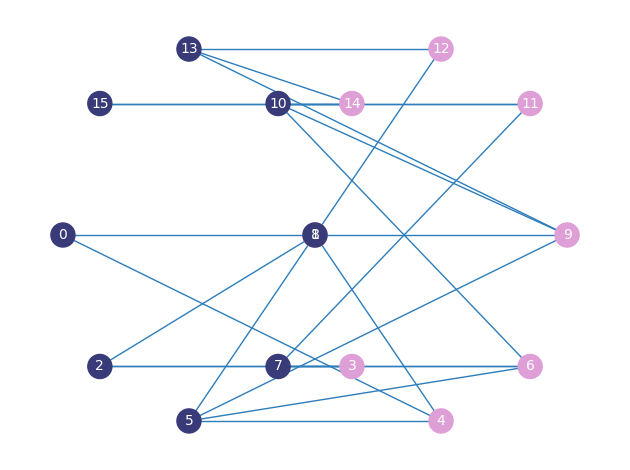

272.8281828459045

In [13]:
# four by four solve
G_fourbyfour = four_by_four()
solve_sa_main(G_fourbyfour)
validate_output(G_fourbyfour)
visualize(G_fourbyfour)
score(G_fourbyfour)

In [46]:
G = read_input('example.in')
# solve_clean(G)
# solve_2_hard(G)
# print()
# print(list(nx.dominating_set(G)))
solve_sa_main(G)
validate_output(G)
visualize(G)
score(G)

KeyboardInterrupt: 

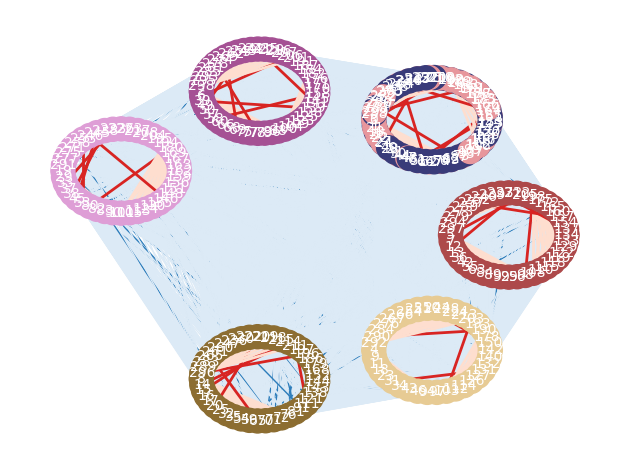

87192.57386940348

In [13]:
# DONT DELETE
# G = read_input('./inputs/small1.in')
G = read_input('medium78.in')
# print(list(nx.dominating_set(G)))
# print()
# solve_2(G)
# solve_2_hard(G)
solve_sa_main(G)
validate_output(G)
visualize(G)
score(G)

In [43]:
# run(solve_clean, 'small.in', 'small.out')
# previous avg rank scores (recent first): 18.594871794871796, 18.57948717948718, 18.553846153846155, 18.52820512820513

In [14]:
# avg_scores = run_all(solve_clean, 'inputs', 'outputs')
# print(f'average scores for large, medium, small: {avg_scores}')
# tar('outputs')

run_all(solve_sa_main, 'inputs', 'outputs')
tar('outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

solving input file: inputs/large225.in


/var/folders/mb/2zpb5htd16z8f7pdn68sml6m0000gn/T/ipykernel_1079/2210273460.py:155: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  teams_2 = random.sample(teams.keys(), 2)
